In [8]:
import pandas as pd
import re
from tqdm import tqdm
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [46]:
def preprocess_read_russia(jk):
    res = []
    for i in tqdm(jk):
        clean_text = re.sub(r'(?:(?!\u0301)[\W\d_])+', ' ', i)
        res.append(clean_text.split())
    return res

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

In [3]:
jokes_raw =pd.read_csv(r"C:\Users\User\Documents\github\He_who_laughs_last\data\Russian_Anecdotes\lemmatized_russian.csv")
jokes_raw.drop('index',axis=1, inplace=True)
jokes_raw['lemmatized'] = preprocess_read_russia(jokes_raw['lemmatized'])

In [35]:
count_dic = {}
for i in tqdm(range(len(jokes_raw))):
    for word in jokes_raw['lemmatized'][i]:
        if word not in count_dic.keys():
            count_dic[word] = 1
        else:
            count_dic[word] += 1


100%|██████████| 264133/264133 [00:03<00:00, 80853.12it/s]


{'колобок': 175,
 'это': 43454,
 'сказка': 896,
 'взросление': 29,
 'парень': 1981,
 'уходить': 1279,
 'родительский': 137,
 'дом': 6150,
 'успешно': 407,
 'преодолевать': 22,
 'жизненный': 218,
 'этап': 216,
 'социализация': 3,
 'заяц': 305,
 'работа': 6232,
 'волк': 620,
 'бытовой': 128,
 'трудность': 115,
 'медведь': 868,
 'встречать': 580,
 'женщина': 8569,
 'который': 15502,
 'обман': 103,
 'завлекать': 5,
 'уничтожать': 113,
 'личность': 319,
 'таки': 4652,
 'удаться': 902,
 'распространить': 127,
 'идеология': 53,
 'менталитет': 56,
 'запад': 1168,
 'бояться': 2144,
 'квитанция': 76,
 'жкх': 334,
 'оценить': 230,
 'состояние': 908,
 'российский': 7773,
 'миллиардер': 438,
 'предынфарктный': 5,
 'свидетельство': 74,
 'рождение': 1094,
 'смерть': 1106,
 'жизнь': 8346,
 'михаил': 487,
 'жванецкий': 110,
 'пожарный': 206,
 'оперативно': 45,
 'потушить': 43,
 'здание': 387,
 'налоговый': 286,
 'грамотно': 33,
 'написать': 2486,
 'письмо': 635,
 'саппорт': 1,
 'уважаемый': 870,
 'госп

In [38]:
counter = sorted(count_dic.items(), key=lambda x:x[1],reverse=True)

In [6]:
jokes_raw['length'] = [len(x) for x in jokes_raw['lemmatized']]

In [1]:
jokes_raw['length']

NameError: name 'jokes_raw' is not defined

In [29]:
for word in jokes_raw[jokes_raw.length == 2031]['lemmatized']:
    print(word)

['знаменитый', 'российский', 'правозащитник', 'изя', 'шмеркович', 'куперштейн', 'журналист', 'спросить', 'жить', 'сталин', 'брежнев', 'ельцин', 'демократия', 'свобода', 'стать', 'сказать', 'сталин', 'мочь', 'довольно', 'свободно', 'критиковать', 'комсомольский', 'собрание', 'брежнев', 'мочь', 'писать', 'газета', 'фельетон', 'местный', 'власть', 'ельцин', 'вообще', 'целый', 'день', 'пропадать', 'митинг', 'никто', 'трогать', 'критика', 'который', 'высказывать', 'вырезать', 'газета', 'телепередача', 'фельетон', 'газета', 'стать', 'вообще', 'оккупать', 'минута', 'хватать', 'штрафовать', 'тысяча', 'рубль', 'лука', 'взять', 'почитать', 'книжка', 'демократия', 'нычаго', 'нэ', 'понять', 'мудренать', 'фыгнить', 'пытаиться', 'впарыть', 'запаный', 'умняк', 'путын', 'точный', 'жа', 'мянить', 'токо', 'ынагд', 'мэняиться', 'мядведявый', 'путин', 'оказаться', 'будущее', 'учебник', 'история', 'начало', 'хх', 'век', 'авторитарный', 'олигархический', 'застойный', 'бюрократический', 'милитаристкий', 'пол

<Axes: ylabel='Frequency'>

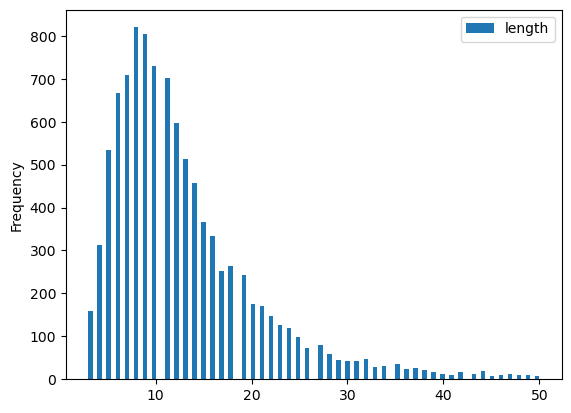

In [16]:
jokes_raw[jokes_raw.length <=50].sample(n=10000,random_state=42).plot(kind='hist',bins=100)

In [18]:
for i in range(10,200,10):
    print('length = ',i, ' ', len(jokes_raw[jokes_raw.length < i]))


length =  10   105660
length =  20   221498
length =  30   249103
length =  40   257225
length =  50   260301
length =  60   261739
length =  70   262521
length =  80   262960
length =  90   263223
length =  100   263424
length =  110   263552
length =  120   263665
length =  130   263750
length =  140   263808
length =  150   263853
length =  160   263899
length =  170   263918
length =  180   263941
length =  190   263953


## Больше 90% анекдотов имеют длину <= 40, имеет смысл отсечь по 30 или 40 датасет
### Как реализую сейчас - размер одного образца датасета других текстов на 30

In [25]:
print(jokes_raw['length'].quantile(0.95))


31.0


In [32]:
test_non_jokes = pd.read_csv(r"C:\Users\User\Documents\large datasets\lenta-ru-news.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_12524\3317035559.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  test_non_jokes = pd.read_csv(r"C:\Users\User\Documents\large datasets\lenta-ru-news.csv")


In [40]:
test_non_joeks = pd.DataFrame(test_non_jokes['text'])
test_non_joeks = pd.DataFrame(test_non_joeks['text'].sample(n=200000, random_state=42)).reset_index()

In [43]:
test_non_joeks.drop('index',axis=1,inplace=True)
test_non_joeks.to_csv(r"C:\Users\User\Documents\large datasets\sampled_news.csv",index=False)

In [44]:
test_non_joeks['text'] = preprocess_read_russia(test_non_joeks['text'])

In [48]:
lemms =[]
for i in tqdm(range(len(test_non_joeks))):
    lemms.append(lemmatize(str(test_non_joeks['text'][i])))

100%|██████████| 200000/200000 [1:24:39<00:00, 39.38it/s]


In [50]:
test_non_joeks['lemmatized'] = lemms

In [52]:
test_non_joeks.to_csv(r"C:\Users\User\Documents\large datasets\sampled_news.csv",index=False)

In [61]:
from navec import Navec
path = r"C:\Users\User\Documents\github\He_who_laughs_last\data\embedded\navec.tar"

In [62]:
navec = Navec.load(path)

In [66]:
navec['сша']

array([ 1.22225314e-01, -8.96903798e-02, -6.91331401e-02,  4.72845107e-01,
        6.66650355e-01, -2.31923044e-01, -5.33670545e-01,  3.86259884e-01,
       -3.74076128e-01,  1.02308266e-01,  7.21088722e-02, -1.89837143e-01,
        6.61767483e-01,  4.32206094e-01,  1.81028858e-01,  2.93090791e-02,
        5.57914078e-01, -1.82104990e-01, -1.91428706e-01, -2.47246593e-01,
       -3.50274682e-01, -2.73519848e-02,  5.43446422e-01,  5.60434759e-02,
       -1.53512925e-01, -2.79658008e-02,  1.98328421e-01,  1.55067369e-01,
       -4.93999034e-01, -3.99363875e-01, -5.01132905e-02, -5.53493738e-01,
        9.01425660e-01,  2.02976272e-01, -2.46240661e-01, -3.98233801e-01,
       -1.64131254e-01, -2.50366479e-01,  1.30595556e-02, -4.88090724e-01,
       -3.40525419e-01, -5.31904846e-02,  3.23487818e-02,  6.88526988e-01,
       -4.79870170e-01, -3.94732237e-01, -4.14399430e-02,  5.49592674e-02,
       -3.68623505e-03,  1.50256038e-01,  2.55308628e-01,  1.93171784e-01,
       -8.28523412e-02,  